In [6]:
import os 
import sys

from desilike.samples import Profiles, Chain, plotting

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use(os.path.join(os.path.abspath('../bin'), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

In [2]:
tracer = 'ELG_LOPnotqso'
region = 'GCcomb'
zrange = (1.1, 1.6)
version = 'v4_1fixran'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/{}'.format(version)

template_name = 'shapefitqisoqap'

chains_dir = os.path.join(data_dir, 'chains', 'chains_{}_{{}}_z{:.3f}-z{:.3f}_{{}}_{}'.format(template_name, zrange[0], zrange[1], region), 'physicalpriorbasis')

chain_complete = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'corr_velocileptors_ezmockscov_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_complete_thetacut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'corr_velocileptors_ezmockscov_thetacut0.05_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_altmtl = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'corr_velocileptors_ezmockscov_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_altmtl_thetacut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'corr_velocileptors_ezmockscov_thetacut0.05_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])

In [3]:
from getdist import plots
g = plots.get_single_plotter(width_inch=6, scaling=False, ratio=1)
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 12
g.settings.alpha_factor_contour_lines = 0

Removed no burn in
Removed no burn in
Removed no burn in


/tmp/ipykernel_637427/776968912.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(plots_dir, version, 'corner_plot_corr_{}_{}_complete_altmtl_thetacut0.05.png'.format(tracer, region)), dpi=300)


<Figure size 600x600 with 0 Axes>

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


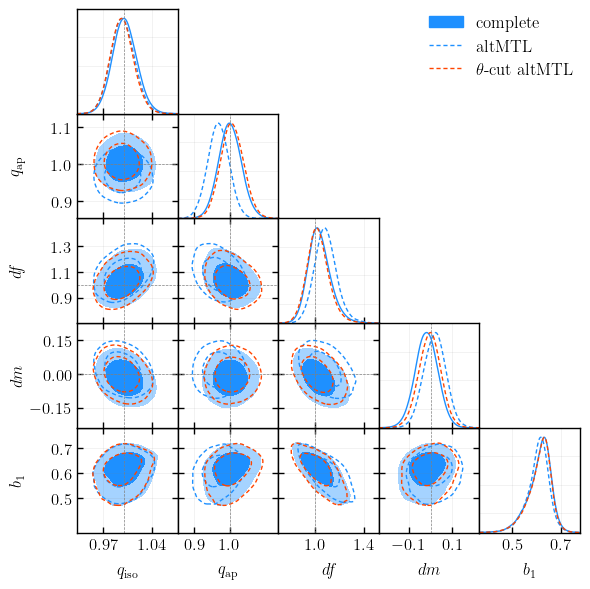

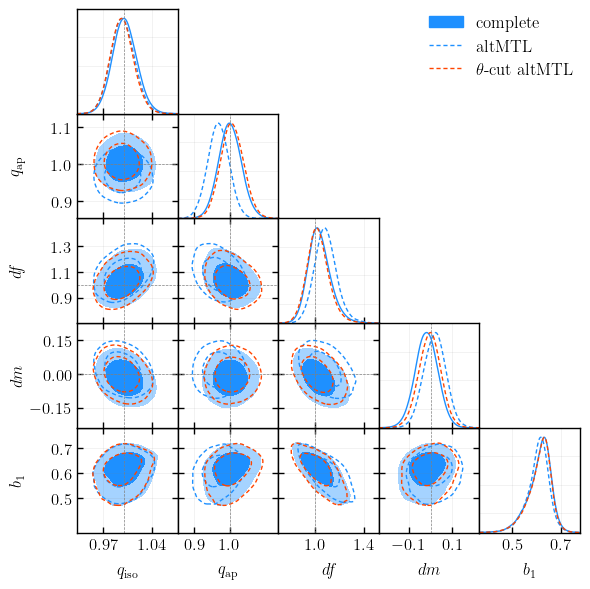

In [7]:
markers = {'qiso': 1., 'qap': 1., 'df': 1., 'dm': 0.}
params = ['qiso', 'qap', 'df', 'dm', 'b1p']
colors = ['dodgerblue', 'dodgerblue', 'orangered']
plotting.plot_triangle([chain_complete, chain_altmtl, chain_altmtl_thetacut], labels=[r'complete', r'altMTL', r'$\theta$-cut altMTL'], 
                       markers=markers, params=params,
                       g=g, lws=1., contour_lws=1., filled=[True, False, False], contour_ls=['-', '--', '--'], colors=colors, contour_colors=colors,
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.savefig(os.path.join(plots_dir, version, 'corner_plot_corr_{}_{}_complete_altmtl_thetacut0.05.png'.format(tracer, region)), dpi=300)
plt.show()

In [5]:
params = ['qiso', 'qap', 'dm', 'df', 'b1p']

for iparam, param in enumerate(params):
    print(param)
    desi_y1_err = chain_altmtl_thetacut.std(param)
    print('Y1 error: ', desi_y1_err)
    #bestfitdiff_thetacut = chain_complete_thetacut.mean(param) - chain_complete.mean(param)
    bestfitdiff_altmtl = chain_altmtl.mean(param) - chain_complete.mean(param)
    bestfitdiff_altmtl_thetacut = chain_altmtl_thetacut.mean(param) - chain_complete.mean(param)
    #print('theta-cut - complete:', bestfitdiff_thetacut, '({:.3f}% of DR1 error)'.format(bestfitdiff_thetacut/desi_y1_err*100))
    print('altmtl - complete:', bestfitdiff_altmtl, '({:.3f}% of DR1 error)'.format(bestfitdiff_altmtl/desi_y1_err*100))
    print('altmtl theta-cut - complete:', bestfitdiff_altmtl_thetacut, '({:.3f}% of DR1 error)'.format(bestfitdiff_altmtl_thetacut/desi_y1_err*100))

qiso
Y1 error:  0.01665496325352485
altmtl - complete: -0.0027125949409601002 (-16.287% of DR1 error)
altmtl theta-cut - complete: -0.003771266093415271 (-22.643% of DR1 error)
qap
Y1 error:  0.032451065140344085
altmtl - complete: -0.032824246425951165 (-101.150% of DR1 error)
altmtl theta-cut - complete: 0.005941784657988114 (18.310% of DR1 error)
dm
Y1 error:  0.052458928959552745
altmtl - complete: 0.03823362645998761 (72.883% of DR1 error)
altmtl theta-cut - complete: 0.015379261698940898 (29.317% of DR1 error)
df
Y1 error:  0.09079799285080725
altmtl - complete: 0.04977666595730068 (54.821% of DR1 error)
altmtl theta-cut - complete: -0.01118484735555314 (-12.318% of DR1 error)
b1p
Y1 error:  0.04898490863022161
altmtl - complete: -0.0058515622495046715 (-11.946% of DR1 error)
altmtl theta-cut - complete: -0.00017615255971847876 (-0.360% of DR1 error)
